<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [6]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 89.2 MB/s eta 0:00:00


##### Import Necessary Modules:


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [8]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [9]:
## Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [10]:
## Write your code here
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_percent
}).round(2)

missing_cols = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("Columns with Missing Values (Top 20):")
print(missing_cols.head(20))

Columns with Missing Values (Top 20):
                               Missing_Count  Missing_Percent
AINextMuch less integrated             64289            98.25
AINextLess integrated                  63082            96.40
AINextNo change                        52939            80.90
AINextMuch more integrated             51999            79.46
EmbeddedAdmired                        48704            74.43
EmbeddedWantToWorkWith                 47837            73.10
EmbeddedHaveWorkedWith                 43223            66.05
ConvertedCompYearly                    42002            64.19
AIToolNot interested in Using          41023            62.69
AINextMore integrated                  41009            62.67
Knowledge_9                            37802            57.77
Frequency_3                            37727            57.65
Knowledge_8                            37679            57.58
ProfessionalTech                       37673            57.57
Knowledge_7                     

##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



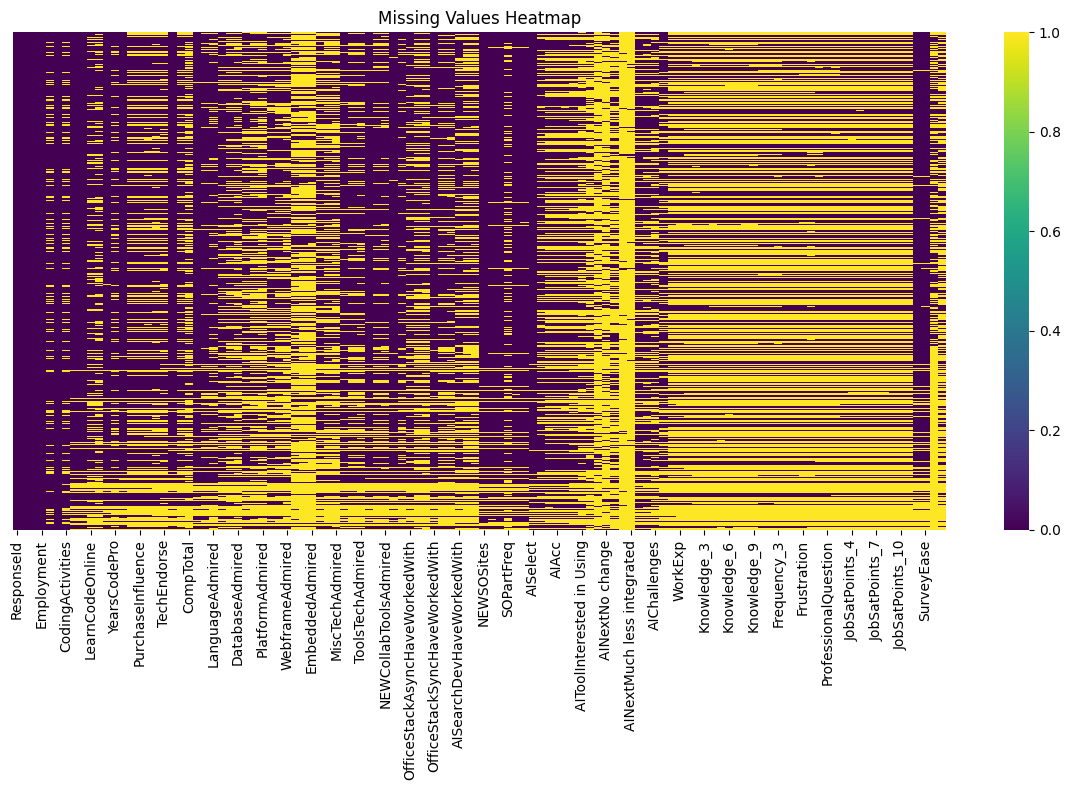

In [11]:
## Write your code here
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [14]:
## Write your code here
missing = df['ProfessionalTech'].isnull().sum()
total_rows = len(df)

print(f"ProfessionalTech missing values: {missing}")
print(f"Percentage missing: {(missing/total_rows)*100:.2f}%")
print(f"Total rows: {total_rows}")

ProfessionalTech missing values: 37673
Percentage missing: 57.57%
Total rows: 65437


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [17]:
## Write your code here
freq = df['ProfessionalTech'].value_counts()

print("ProfessionalTech value counts (top 5):")
freq.head()

ProfessionalTech value counts (top 5):


ProfessionalTech
None of these                                                                                                                                                                                                                                                                             2834
DevOps function;Automated testing;Observability tools;Knowledge sharing community;AI-assisted technology tool(s);Microservices;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Innersource initiative    1068
DevOps function;Automated testing;Observability tools;Knowledge sharing community;AI-assisted technology tool(s);Microservices;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery                            706
Automated testing;Continuous integration (CI) and (more often) continuous delivery                                        

In [19]:
most_frequent = df['ProfessionalTech'].mode()
if len(most_frequent) > 0:
    majority_value = most_frequent[0]
    majority_count = freq[majority_value]
    majority_pct = (majority_count / len(df)) * 100
    
    print(f"Most frequent ProfessionalTech value: '{majority_value}'")
    print(f"Count: {majority_count}")
    print(f"Percentage: {majority_pct:.1f}%")
else:
    print("No non-null values in ProfessionalTech!")

Most frequent ProfessionalTech value: 'None of these'
Count: 2834
Percentage: 4.3%


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [23]:
## Write your code here
most_frequent_protech = df['ProfessionalTech'].mode()[0]
print(f"Most frequent ProfessionalTech value: '{most_frequent_protech}'")

missing_before = df['ProfessionalTech'].isnull().sum()
print(f"Missing ProfessionalTech before: {missing_before}")

df['ProfessionalTech'] = df['ProfessionalTech'].fillna(most_frequent_protech)

missing_after = df['ProfessionalTech'].isnull().sum()
print(f"Missing ProfessionalTech after: {missing_after}")
print(f"Successfully imputed {missing_before} values!")

Most frequent ProfessionalTech value: 'None of these'
Missing ProfessionalTech before: 0
Missing ProfessionalTech after: 0
Successfully imputed 0 values!


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


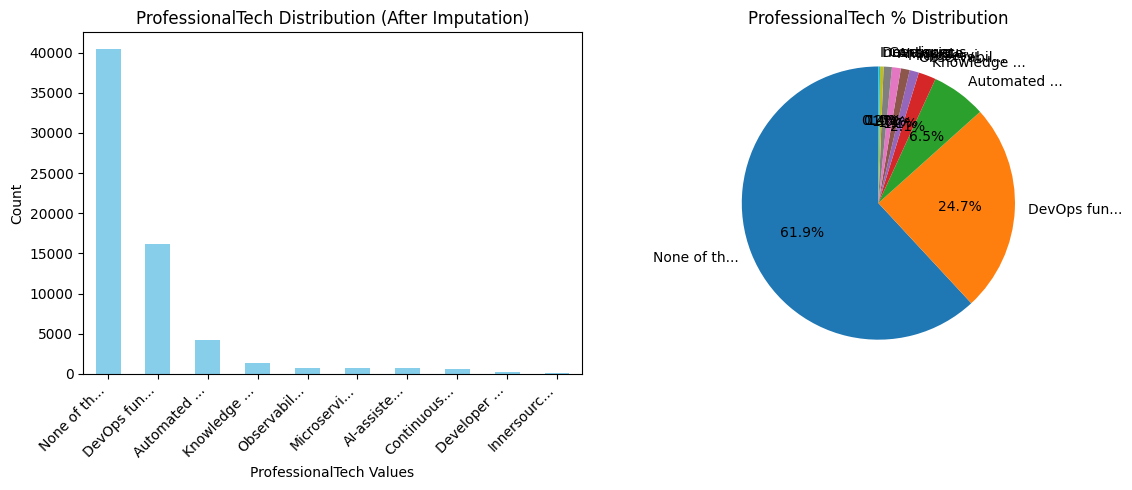

ProfessionalTech Summary:
ProfessionalTech
None of these                                                                                                                                                                                                                                                                             40507
DevOps function;Automated testing;Observability tools;Knowledge sharing community;AI-assisted technology tool(s);Microservices;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Innersource initiative     1068
DevOps function;Automated testing;Observability tools;Knowledge sharing community;AI-assisted technology tool(s);Microservices;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery                             706
Automated testing;Continuous integration (CI) and (more often) continuous delivery           

In [30]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Short_ProfTech'] = df['ProfessionalTech'].apply(lambda x: x[:10] + '...' if len(x) > 10 else x)
prof_tech_counts = df['Short_ProfTech'].value_counts()
prof_tech_counts.plot(kind='bar', color='skyblue')
plt.title('ProfessionalTech Distribution (After Imputation)')
plt.xlabel('ProfessionalTech Values')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
if len(prof_tech_counts) <= 10:
    prof_tech_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.ylabel('')
plt.title('ProfessionalTech % Distribution')

plt.tight_layout()
plt.show()

print("ProfessionalTech Summary:")
print(df['ProfessionalTech'].value_counts())
print(f"\nMissing before imputation: {df['ProfessionalTech'].isnull().sum()}")


### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
